[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/10ViePlyM_Qp6vKp1Ep6YhE8a6oFsc-fc)


---





#### Run this on Colab! Jupyter wouldn't work with conflicting dependencies

- demonstrator package needed for draw Graph Networks
- open3d, pptk for visualizing point clouds

In [1]:
!pip install torch==1.8.0

     |████████████████████████████████| 735.5MB 21kB/s 
ERROR: torchvision 0.9.1+cu101 has requirement torch==1.8.1, but you'll have torch 1.8.0 which is incompatible.
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.8.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101


In [2]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu102.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu102.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.8.0+cu102.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.8.0+cu102.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu102.html
     |████████████████████████████████| 2.7MB 296kB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu102.html
     |████████████████████████████████| 1.5MB 303kB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu102.html
     |████████████████████████████████| 1.1MB 229kB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu102.html
     |████████████████████████████████| 399kB 3.2MB/s 
     |████████████████████████████████| 215kB 7.6MB/s 
     |████████████████████████████████| 235kB 11.7MB/s 
     |████████████████████████████████| 2.2MB 9.1MB/s 
     |████████████████████████████████| 51kB 7.3MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.7.0-cp37-none-any.whl size=365386 sha256=f960beb3aac54236fbeed020dbe05e6a5c91b93a30a292ae90f219f75003a115
  Stored in directory: /root/.cache/pip/wheels/ce/fb/df/37cd43d1433e65b2d3417a71438404d0ee

In [3]:
!pip install geometric-vector-perceptron

In [4]:
import os

import numpy as np
import pandas as pd
from pathlib import Path

import torch
from torch import nn 

from torch_geometric.nn import knn_graph
from torch_geometric import transforms, utils
from torch_geometric.data import Data, DataLoader

import networkx as nx

import geometric_vector_perceptron as gvp
from geometric_vector_perceptron import GVP, GVPDropout, GVPLayerNorm

In [5]:
data_path = Path('/content/drive/MyDrive/EE+AI_Y4/COMP6248 Deep Learning/Reproducibility Challenge/synthetic')

cnn = torch.from_numpy(np.load(data_path/"cnn.npy"))
synthetic = torch.from_numpy(np.load(data_path/"synthetic.npy"))
with np.load(data_path/"answers.npz") as data:
    # off_center = torch.from_numpy(data["off_center"])
    perimeter = torch.from_numpy(data["perimeter"])
off_center = torch.from_numpy(np.load(data_path/"OCR.npy"))

In [6]:
def encode_protein(synthetic, off_center, perimeter, batch_size=32):

    # add one-hot vector to the last dimension
    is_special = torch.zeros((20000, 2, 100, 1))
    is_special[:, 1, :3] = 1 
    synthetic = torch.cat([synthetic, is_special], dim=3) # (2000, 2, 100, 3)       -> (20000, 2, 100, 4) -- last channel corresponds to is_special

    synthetic_transforms = transforms.Compose(
    [
        transforms.KNNGraph(k=10),
        transforms.Cartesian()
    ])

    data_list = [
        synthetic_transforms(Data(x=synthetic[n, 1], 
        pos=synthetic[n,0, :, :3], 
        y=torch.tensor([off_center[n], perimeter[n]]))) 
        for n in range(synthetic.shape[0])
        ]

    dataloader = DataLoader(data_list, batch_size=batch_size)

    return dataloader

dataloader = encode_protein(synthetic, off_center, perimeter, batch_size=32)

Number of nodes: 100
Number of edges: 1000
Average node degree: 10.00
Contains isolated nodes: False
Contains self-loops: False
Is undirected: False

Graph Network for Protein Structure 1


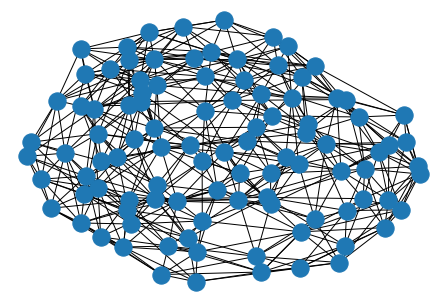

In [ ]:
dataloader = encode_protein(synthetic, off_center, perimeter, batch_size=32)

data = next(iter(dataloader))[0]

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
# print(f'Number of training nodes: {data.train_mask.sum()}')
# print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

print('')
print('===========================================')
print('Graph Network for Protein Structure 1')
g = utils.to_networkx(data, to_undirected=True)
nx.draw(g)

Number of nodes: 100
Number of edges: 1000
Average node degree: 10.00
Contains isolated nodes: False
Contains self-loops: False
Is undirected: False

Graph Network for Protein Structure 32


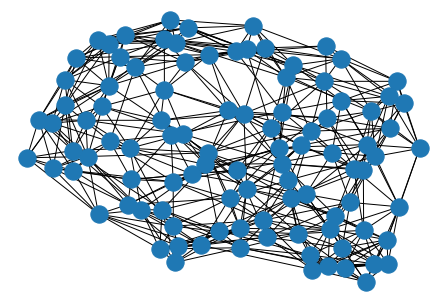

In [ ]:
data_32 = next(iter(dataloader))[31]

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
# print(f'Number of training nodes: {data.train_mask.sum()}')
# print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.contains_isolated_nodes()}')
print(f'Contains self-loops: {data.contains_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

print('')
print('===========================================')
print('Graph Network for Protein Structure 32')
g = utils.to_networkx(data_32, to_undirected=True)
nx.draw(g)

### Visualization of Point Clouds

In [7]:
!pip install open3d

     |████████████████████████████████| 188.4MB 76kB/s 


In [ ]:
data.x.shape

torch.Size([100, 4])

In [ ]:
import open3d as o3d
import plotly.graph_objects as go


sidechain_points = data.x[:,[0,1,2]].cpu().detach().numpy()
points = data.pos.cpu().detach().numpy()
print(points.shape)

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:,0][3:], y=points[:,1][3:], z=points[:,2][3:], 
            mode='markers',
            marker=dict(size=5, color='blue'),
            opacity=0.7,
            name='Non-special Points'
        ),
        go.Scatter3d(
            x=points[:,0][:3], y=points[:,1][:3], z=points[:,2][:3], 
            mode='markers',
            marker=dict(size=5, color='red'), 
            name='Special Points'
        
        ), 
        go.Scatter3d(
            x=sidechain_points[:,0], y=sidechain_points[:,1], z=sidechain_points[:,2], 
            mode='markers',
            marker=dict(size=5, color='yellow'), 
            name='Sidechains'
        
        )
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        ), 
        title='Point Clouds of Protein Structure 1'
    )
)
fig.show()

(100, 3)


In [ ]:
sidechain_points = data_32.x[:,[0,1,2]].cpu().detach().numpy()
points = data_32.pos.cpu().detach().numpy()
print(points.shape)

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:,0][3:], y=points[:,1][3:], z=points[:,2][3:], 
            mode='markers',
            marker=dict(size=5, color='blue'),
            opacity=0.7,
            name='Non-special Points'
        ),
        go.Scatter3d(
            x=points[:,0][:3], y=points[:,1][:3], z=points[:,2][:3], 
            mode='markers',
            marker=dict(size=5, color='red'), 
            name='Special Points'
        
        ),
        go.Scatter3d(
            x=sidechain_points[:,0], y=sidechain_points[:,1], z=sidechain_points[:,2], 
            mode='markers',
            marker=dict(size=5, color='yellow'), 
            name='Sidechains'
        
        )
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        ), 
        title='Point Clouds of Protein Structure 32'
    )
)
fig.show()


(100, 3)


#### Visualising Voxelised Point Clouds

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
cnn[:,:,:,:,0].shape

torch.Size([20000, 20, 20, 20])

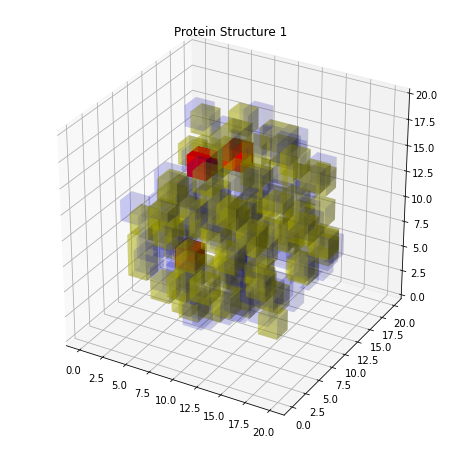

In [ ]:
special_points = cnn[:,:,:,:,0][0]
non_special_points = cnn[:,:,:,:,1][0]
sidechain = cnn[:,:,:,:,2][0]

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_title('Protein Structure 1')


ax.voxels(special_points, facecolors='r')
ax.voxels(non_special_points, facecolors='b', alpha=0.1)
ax.voxels(sidechain, facecolors='y', alpha=0.3)

plt.show()

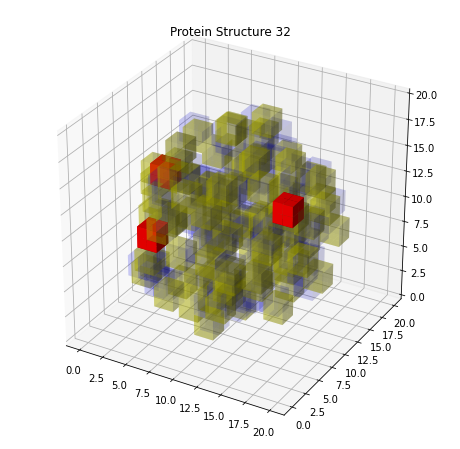

In [ ]:
special_points = cnn[:,:,:,:,0][31]
non_special_points = cnn[:,:,:,:,1][31]
sidechain = cnn[:,:,:,:,2][31]

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.set_title('Protein Structure 32')


ax.voxels(special_points, facecolors='r')
ax.voxels(non_special_points, facecolors='b', alpha=0.1)
ax.voxels(sidechain, facecolors='y', alpha=0.3)

plt.show()

### CATH dataset

In [7]:
!pip install py3Dmol

In [66]:
!pip install proDy

     |████████████████████████████████| 6.3MB 7.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for proDy: filename=ProDy-2.0-cp37-cp37m-linux_x86_64.whl size=6653589 sha256=5ca2d1d11ed90765a84a9e347a228bbd67a1068eea9c93cd1bca57ac491d1cca
  Stored in directory: /root/.cache/pip/wheels/e2/be/52/a879e8adf713065f8f11e15c56073b311e82ecc85bbeb8b6c4
Successfully built proDy


In [8]:
!wget http://people.csail.mit.edu/ingraham/graph-protein-design/data/cath/chain_set.jsonl
!wget http://people.csail.mit.edu/ingraham/graph-protein-design/data/cath/chain_set_splits.json
!wget http://people.csail.mit.edu/ingraham/graph-protein-design/data/SPIN2/test_split_L100.json
!wget http://people.csail.mit.edu/ingraham/graph-protein-design/data/SPIN2/test_split_sc.json

--2021-05-11 12:21:34--  http://people.csail.mit.edu/ingraham/graph-protein-design/data/cath/chain_set.jsonl
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.30.2.133
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.30.2.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 517020503 (493M)
Saving to: ‘chain_set.jsonl’

chain_set.jsonl     100%[===================>] 493.07M  9.08MB/s    in 60s     

2021-05-11 12:22:35 (8.16 MB/s) - ‘chain_set.jsonl’ saved [517020503/517020503]

--2021-05-11 12:22:35--  http://people.csail.mit.edu/ingraham/graph-protein-design/data/cath/chain_set_splits.json
Resolving people.csail.mit.edu (people.csail.mit.edu)... 128.30.2.133
Connecting to people.csail.mit.edu (people.csail.mit.edu)|128.30.2.133|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 784409 (766K) [application/json]
Saving to: ‘chain_set_splits.json’

chain_set_splits.js 100%[===================>] 766.02K  1.84MB/s    in

In [9]:
import json


seq_list = []
coords_list = []
num_chains_list = []
name_list = []
CATH_list = []


c = 0
for line in open('/content/chain_set.jsonl', 'r'):
    data = json.loads(line)

    # Sequence data
    seq_list.append(data.get('seq'))
    for k, v in data.items():
      # print(k)

      if k == 'seq':
        print('seq: ', len(data.get('seq')))
        print(data.get('seq'))
        seq_list.append(data.get('seq'))

      elif k == 'coords':
        print('coords:', len(data.get('coords')))
        # print([i for i in data.get('coords')])

      elif k == 'num_chains':
        print('num_chains:', data.get('num_chains'))
        num_chains_list.append(data.get('num_chains'))

      elif k == 'name':
        print('name:', data.get('name'))
        name_list.append(data.get('name'))

      elif k == 'CATH':
        print('CATH:', data.get('CATH'))
        CATH_list.append(data.get('CATH'))

    print('')

    
    if c == 10:
      break 
    
    c+=1
    

# df_cath = pd.DataFrame.from_dict(data, orient='index').T.set_index('index')
# df_cath

seq:  330
coords: 4
num_chains: 8
name: 12as.A
CATH: ['3.30.930']

seq:  129
coords: 4
num_chains: 2
name: 132l.A
CATH: ['1.10.530']

seq:  185
coords: 4
num_chains: 2
name: 153l.A
CATH: ['1.10.530']

seq:  135
coords: 4
num_chains: 2
name: 155c.A
CATH: ['1.10.760']

seq:  415
coords: 4
num_chains: 4
name: 16pk.A
CATH: ['3.40.50']

seq:  366
coords: 4
num_chains: 4
name: 16vp.A
CATH: ['1.10.1290']

seq:  210
coords: 4
num_chains: 9
name: 17gs.A
CATH: ['3.40.30', '1.20.1050']

seq:  232
coords: 4
num_chains: 4
name: 1914.A
CATH: ['3.30.720']

seq:  292
coords: 4
num_chains: 27
name: 19hc.A
CATH: ['3.90.10']

seq:  146
coords: 4
num_chains: 12
name: 1a00.B
CATH: ['1.10.490']

seq:  56
coords: 4
num_chains: 10
name: 1a02.F
CATH: ['1.20.5']



In [15]:
seq_list[0]

'MKTAYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLSGAEKAVQVKVKALPDAQFEVVHSLAKWKRQTLGQHDFSAGEGLYTHMKALRPDEDRLSPLHSVYVDQWDWERVMGDGERQFSTLKSTVEAIWAGIKATEAAVSEEFGLAPFLPDQIHFVHSQELLSRYPDLDAKGRERAIAKDLGAVFLVGIGGKLSDGHRHDVRAPDYDDWSTPSELGHAGLNGDILVWNPVLEDAFELSSMGIRVDADTLKHQLALTGDEDRLELEWHQALLRGEMPQTIGGGIGQSRLTMLLLQLPHIGQVQAGVWPAAVRESVPSLL'

In [155]:
import py3Dmol

def view_protein(pdb):
  
  print('PDB ID: ', pdb)

  pdbID = str('pdb:'+pdb.split('.')[0])
  chain = pdb.split('.')[1]

  view = py3Dmol.view(query=pdbID, options={"doAssembly": False}, width=400, height=300)
  view.setStyle({'cartoon':{'opacity':.7, 'color':'white'}})
  ch = {'chain':chain}
  view.setStyle(ch,{'cartoon': {'color':'blue'}})
  view.show()


In [156]:
[view_protein(id) for id in name_list]

PDB ID:  12as.A


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  132l.A


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  153l.A


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  155c.A


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  16pk.A


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  16vp.A


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  17gs.A


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  1914.A


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  19hc.A


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  1a00.B


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

PDB ID:  1a02.F


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

[None, None, None, None, None, None, None, None, None, None, None]

In [86]:
from prody import *
from numpy import *
from matplotlib.pyplot import *
%matplotlib inline
confProDy(auto_show=False)
confProDy(auto_secondary=True)

@> ProDy is configured: auto_show=False
@> ProDy is configured: auto_secondary=True


In [95]:
protein1 = parsePDB('12As')

@> PDB file is found in working directory (12as.pdb.gz).
@> 5385 atoms and 1 coordinate set(s) were parsed in 0.07s.
@> Secondary structures were assigned to 357 residues.


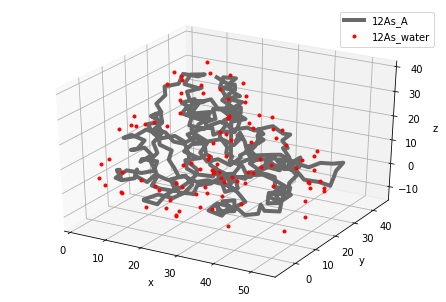

In [137]:
# Show Chain A of 12As protein

showProtein(protein1['A'], draw='matplotlib')
legend();